In [1]:
!pip install pandas-profiling

In [2]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/sales_full_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.shape
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,18,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              18
Order Date          142396
Purchase Address    140788
dtype: int64

In [6]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.data.shape, boston.target.shape


((506, 13), (506,))

In [8]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
df.dropna(axis='index',subset=['Order Date'],inplace=True)  #DATA CLEANING

In [11]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
result = df.reset_index(drop=True)

In [14]:
result.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
result['Order Date'].min()

'01-01-19 10:02'

1. Which month had highest and lowest sales ? What could be the reason behind it ?

In [16]:
def fetch_year(data):
  return data.split()[0]

In [17]:
def fetch_time(data):
  return data.split()[1]

In [19]:
result['Date']= result['Order Date'].apply(fetch_year)

In [20]:
result['Time']= result['Order Date'].apply(fetch_time)
result = result.drop(columns='Order Date')

In [21]:
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30
2,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27


In [22]:
def month(data):
  if '/' in data :
    return data.split('/')[0]
  if '-' in data:
    return data.split('-')[0]

In [23]:
final = pd.DataFrame()

In [24]:
result['Month']= result['Date'].apply(month)

In [25]:
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,04
2,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,04


In [37]:
resulttype = result.dtypes
print(resulttype)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Purchase Address    object
Date                object
Time                object
Month               object
dtype: object


In [31]:
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x:x.strip() )

In [46]:
#result['Quantity Ordered']=result['Quantity Ordered'].to_numeric()
#result['Quantity Ordered'] = result['Quantity Ordered'].astype(str)
result['Quantity Ordered']=pd.to_numeric(result['Quantity Ordered'],errors='coerce')
result['Price Each']= pd.to_numeric(result['Price Each'],errors='coerce')
#pd.to_numeric(df.B, errors='coerce')

In [48]:
result['Sales']= result['Quantity Ordered']*result['Price Each']

In [49]:
resulttype = result.dtypes
print(resulttype)

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Purchase Address     object
Date                 object
Time                 object
Month                object
Sales               float64
dtype: object


In [53]:
result.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,04,99.99
2,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04,600.00
3,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04,11.99
4,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,04,11.99


In [50]:
res = result.groupby('Month')['Sales'].sum().reset_index()

In [51]:
res

,Month,Sales
0,01,1.822257e+06
1,02,2.202022e+06
2,03,2.807100e+06
3,04,3.390670e+06
4,05,3.152607e+06
5,06,2.577802e+06
6,07,2.647776e+06
7,08,2.244468e+06
8,09,2.097560e+06
9,10,3.736727e+06


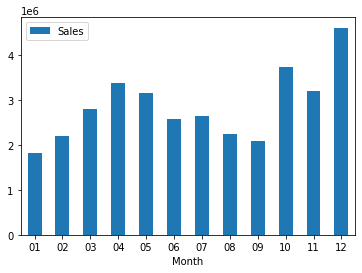

In [52]:
import plotly.express as px
import matplotlib.pyplot as plt
ax = res.plot.bar(x='Month', y='Sales', rot=0)

Hence December is the month of highest sales (due to holiday and Christmas) where as January is the month of lowest sales as per my hypothesis. To prove this hypothesis , data is not sufficient.


2. At what time we should put out advertisement so that sales increases ?

In [57]:
import datetime
result['Time']= pd.to_datetime(result['Time'],errors='coerce')


In [59]:
resulttype = result.dtypes
print(resulttype)

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Purchase Address            object
Date                        object
Time                datetime64[ns]
Month                       object
Sales                      float64
dtype: object


In [61]:
result['Hour']= result['Time'].dt.hour
result

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales,Hour
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,2021-11-15 08:46:00,04,23.90,8.0
1,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,2021-11-15 22:30:00,04,99.99,22.0
2,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,2021-11-15 14:38:00,04,600.00,14.0
3,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,2021-11-15 14:38:00,04,11.99,14.0
4,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,2021-11-15 09:27:00,04,11.99,9.0
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3.0,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,2021-11-15 20:56:00,09,8.97,20.0
186301,259354,iPhone,1.0,700.00,"216 Dogwood St, San Francisco, CA 94016",09-01-19,2021-11-15 16:00:00,09,700.00,16.0
186302,259355,iPhone,1.0,700.00,"220 12th St, San Francisco, CA 94016",09/23/19,2021-11-15 07:39:00,09,700.00,7.0
186303,259356,34in Ultrawide Monitor,1.0,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,2021-11-15 17:30:00,09,379.99,17.0


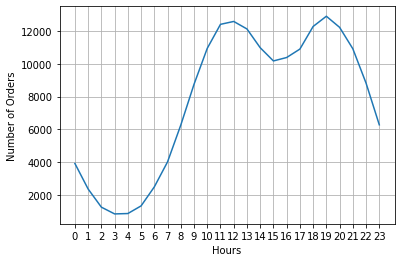

In [64]:
res2 = result.groupby(['Hour'])['Quantity Ordered'].count()
hrs = [hour for hour,df in result.groupby('Hour')]
plt.plot(hrs,res2)
plt.xticks(hrs)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

We suggest to advertise the product right before 12 PM and/or 7 PM. As there are two peaks which clearly shows the prime time of shopping is these two hours.

3. What product sold the most?

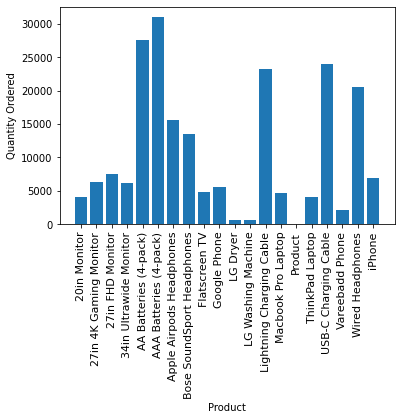

In [67]:
p_grp = result.groupby('Product')
q_order = p_grp.sum()['Quantity Ordered']
prod = [product for product,df in p_grp]
plt.bar(prod, q_order)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(prod,rotation = 'vertical',size = 11)
plt.show()

The product that is sold the most is AAA Batteries (4-pack ). Cheaper rates can be the reason for it (a hypothesis ).